<img src="https://cekumagroup.cas.lehigh.edu/sites/cekumagroup.cas2.lehigh.edu/files/image10.jpg "/>

## Survival of Titanic Passengers

### Data Information
#### The Titanic dataset provides information on the fate of passengers on the Titanic, summarized according to economic status, sex, age, and survival
### Problem Statement
* Our task is to predict the survival of the Titanic passengers

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style = 'white',color_codes=True)
sns.set(font_scale=1.5)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
from sklearn import metrics

In [2]:
df_train = pd.read_csv('train.csv')
df_train.shape

(891, 12)

In [3]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Check for distinct information of the features

In [4]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
### We drop the cabin, Name, Ticket as they are not relevant parameters
df_train = df_train.drop(['PassengerId','Name', 'Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# Deal with the missing values in the age variable
# The younger the passenger is, the more likely he/she will be in the third class
# The older the passenger is, the more likely he/she will be in the first class, etc
# Assign the age for the missing numbers based on this information
# Define a function to handle this
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [13]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [14]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
# We can just drop the two null values in the Embarked variable
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [17]:
# Observe that Sex and Embarked are of categorical type. 
# We can use pd.get_dummies(df_train,colums=['sex']), etc or the encoder as below
for c in ['Sex', 'Embarked']:
    print(f"Label Encoding: {c} - {df_train[c].nunique()}")
    le = LabelEncoder()
    df_train[c] = le.fit_transform(df_train[c]) 

Label Encoding: Sex - 2
Label Encoding: Embarked - 3


In [18]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


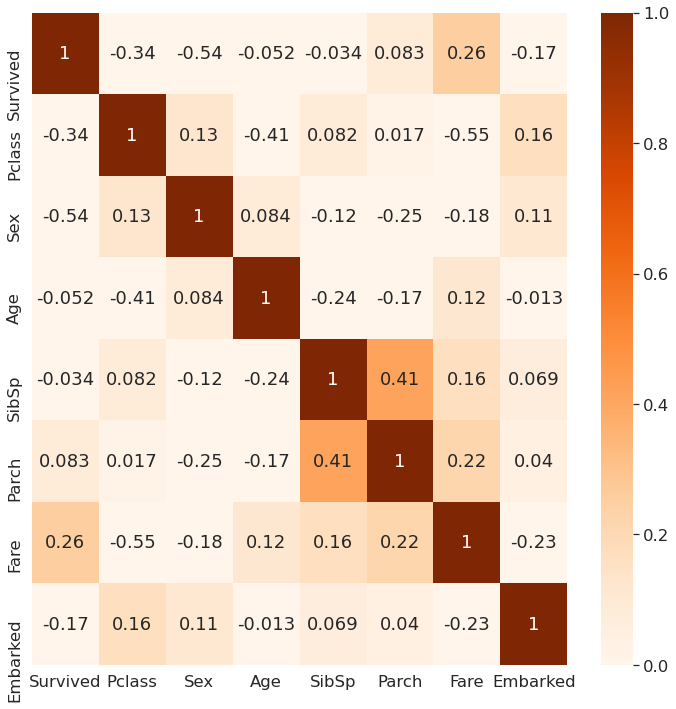

In [19]:
# We next check if the variables are correlated. Let's use heatmap
#plt.figure(figsize=(6,4))
#sns.heatmap(df_train.corr())
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_train.corr(), cmap="Oranges", annot = True, vmin=0, vmax=1, ax=ax);

In [20]:
correlation = df_train.corr()
correlation.style.background_gradient() #This compliments the heatmap and also gives numerical values

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.052051,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.405549,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.083730,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.052051,-0.405549,0.083730,1.000000,-0.242807,-0.170089,0.120938,-0.013385
SibSp,-0.034040,0.081656,-0.116348,-0.242807,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.170089,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.120938,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.013385,0.068900,0.040449,-0.226311,1.000000


In [21]:
# Use the ones with strong correlation to build the features
used_features = ['Pclass','Age','SibSp','Sex','Embarked']
X = df_train[used_features].values # Independent variables
y = df_train['Survived'] # Dependent variable

In [22]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,train_size=0.70,random_state=42)

In [23]:
# Check the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 5)
(267, 5)
(622,)
(267,)


In [24]:
# Use logistic regression to the training data
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression()

In [25]:
# Store the prediction given by the classifier 
y_pred = LogReg.predict(X_test)

In [26]:
#Compute the confusion matrics to evaluate the accuracy of the classification
metrics.confusion_matrix(y_test,y_pred)

array([[139,  28],
       [ 25,  75]])

### Inferences from the confusion metrics
* Out of 167 actual instances of not survived, the model (classifier) predicted correctly 139 of them
* Out of the 100 actual instances of survived, the model (classifier) predicted correctly 75 of them

In [27]:
metrics.accuracy_score(y_test,y_pred)

0.8014981273408239

### Inference from the accuracy score
* Our model has an accuracy of 80%, i.e., out of every 100 passenger it classified, 80% is correctly classified as survived or not survived

In [28]:
len(X_test)

267

In [29]:
# Let us print other performance measures from the confusion metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.73      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



## Inference
* The algorithm has good precision and recall scores

In [30]:
# Print out the intercept and the coefficient
LogReg.coef_

array([[-1.19532306, -0.04915607, -0.39846052, -2.59337007, -0.28660967]])

In [31]:
LogReg.intercept_

array([5.9307292])

In [32]:
# Finally, use the X_test score values to check the algorithm predicted probabilites
df_train[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Sex', 'Embarked'], dtype='object')

In [33]:
LogReg.predict_proba(X_test)

array([[0.90008769, 0.09991231],
       [0.0441275 , 0.9558725 ],
       [0.22129863, 0.77870137],
       [0.7504827 , 0.2495173 ],
       [0.03635548, 0.96364452],
       [0.89557934, 0.10442066],
       [0.70170037, 0.29829963],
       [0.86460857, 0.13539143],
       [0.08167083, 0.91832917],
       [0.03694344, 0.96305656],
       [0.60180782, 0.39819218],
       [0.45181636, 0.54818364],
       [0.96540334, 0.03459666],
       [0.87270922, 0.12729078],
       [0.90442217, 0.09557783],
       [0.90008769, 0.09991231],
       [0.67133468, 0.32866532],
       [0.80664498, 0.19335502],
       [0.72623143, 0.27376857],
       [0.88096235, 0.11903765],
       [0.7324834 , 0.2675166 ],
       [0.08759082, 0.91240918],
       [0.94716924, 0.05283076],
       [0.41988108, 0.58011892],
       [0.88096235, 0.11903765],
       [0.45616449, 0.54383551],
       [0.69485273, 0.30514727],
       [0.13848297, 0.86151703],
       [0.56216611, 0.43783389],
       [0.71188652, 0.28811348],
       [0.

### Interpretation and meaning of the output above
* First column is the probability that the entry has not survived label
* Second columnis the probability that the entry has the survived label
* Note the sum of any two rows must be equal to one as per the normalized probability value of 1